In [5]:
setwd('/Users/alexis/University of North Carolina at Chapel Hill - Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1003. Ozone Sterols Healthy Asthma/P1003.3. Analyses/P1003.3.4. ML Visualizations/P1003.3.4.2. Confusion Matrix Figure/Input')
Output = ('/Users/alexis/University of North Carolina at Chapel Hill - Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1003. Ozone Sterols Healthy Asthma/P1003.3. Analyses/P1003.3.4. ML Visualizations/P1003.3.4.2. Confusion Matrix Figure/Output')
cur_date = "040122"

library(readxl)
library(tidyverse)
library(ggrepel)
library(tidytext)

#reading in files
confusion_matrix_df = data.frame(read_excel("030922_Ozone_Response_All_Model_Results.xlsx"))

In [6]:
head(confusion_matrix_df)

,Model,Response,Covariates,Kernel,Balanced.Accuracy,Sensitivity,Specificity,PPV,AUC
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,RF Classification,Inflammatory,Yes,NA,0.5666667,0.9333333,0.2,0.706666666666667,0.5666667
2,SVM Classification,Inflammatory,No,polynomial,0.5333333,0.8666667,0.2,0.70333333333333303,0.5333333
3,SVM Classification,Inflammatory,No,radial,0.5000000,1.0000000,0.0,0.67333333333333301,0.5000000
4,SVM Classification,Inflammatory,Yes,radial,0.5000000,1.0000000,0.0,0.67333333333333301,0.5000000
5,KNN Classification,Inflammatory,No,NA,0.5000000,0.0000000,1.0,NA,0.5000000
6,KNN Classification,Inflammatory,Yes,NA,0.5000000,0.0000000,1.0,NA,0.5000000


In [25]:
longer_confusion_matrix = confusion_matrix_df %>%
    mutate(PPV = as.numeric(PPV)) %>%
    pivot_longer(cols = 5:9, names_to = "Metric", values_to = "Value") %>%
    #removing "classification" from model names for easier plotting
    separate(Model, c("Model", NA), sep = " ") 

longer_confusion_matrix$Model = factor(longer_confusion_matrix$Model, levels = c("KNN", "SVM", "RF"))
    
head(longer_confusion_matrix)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


Model,Response,Covariates,Kernel,Metric,Value
<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>
RF,Inflammatory,Yes,NA,Balanced.Accuracy,0.5666667
RF,Inflammatory,Yes,NA,Sensitivity,0.9333333
RF,Inflammatory,Yes,NA,Specificity,0.2000000
RF,Inflammatory,Yes,NA,PPV,0.7066667
RF,Inflammatory,Yes,NA,AUC,0.5666667
SVM,Inflammatory,No,polynomial,Balanced.Accuracy,0.5333333


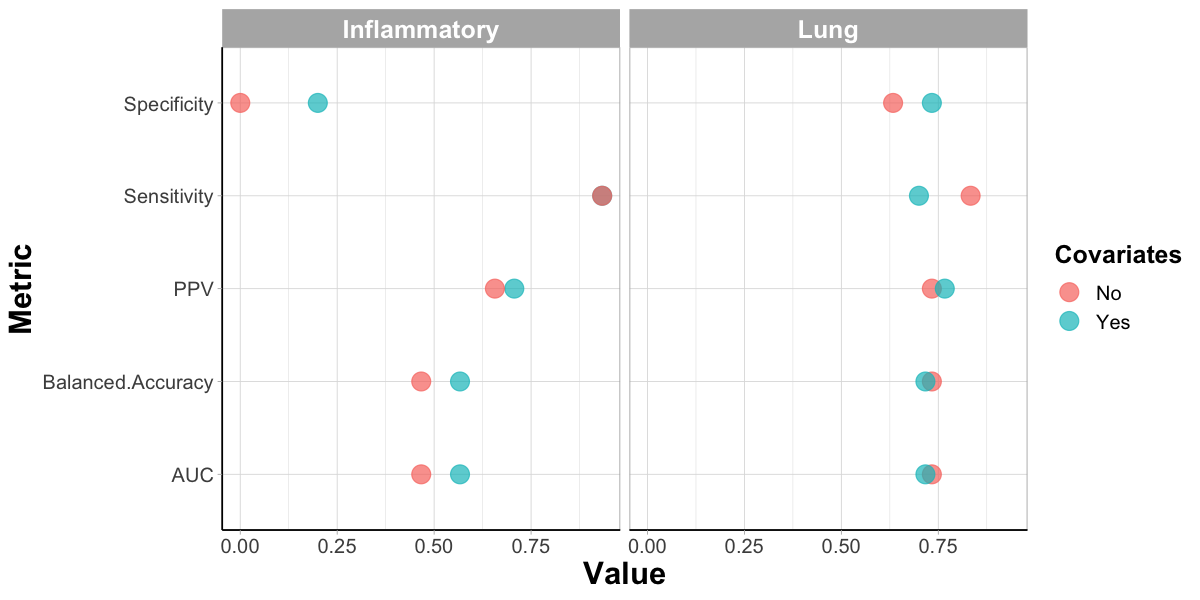

In [9]:
options(repr.plot.width=10, repr.plot.height=5) #changing size
ggplot() + 
  geom_point(data = longer_confusion_matrix %>%
                 filter(Model == "RF Classification"), aes(x = Value, y = Metric, color = Covariates), size = 5,
            alpha = 0.7) + 

  facet_wrap(~Response) + 
  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 15), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Value') + ylab('Metric')  #changing axis labels 

Warning message:
“Removed 3 rows containing missing values (geom_point).”


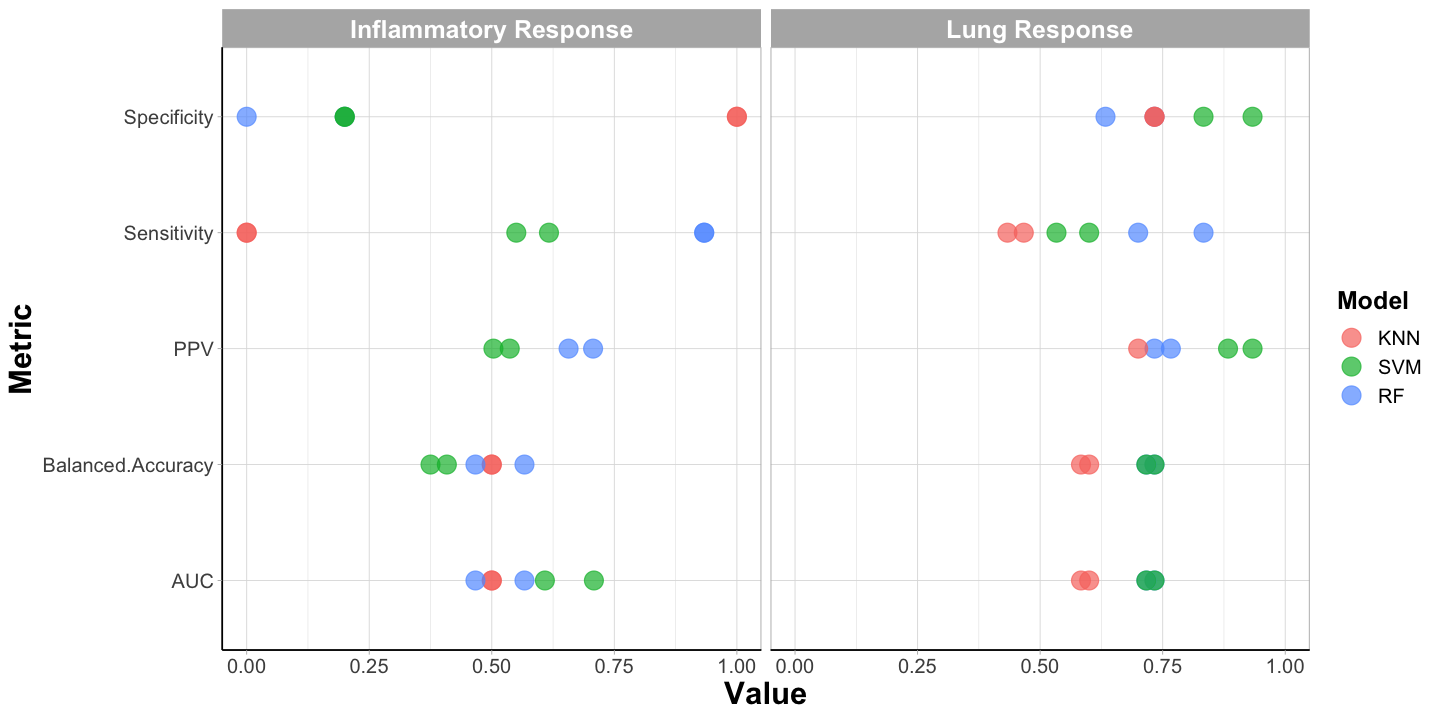

In [37]:
#all models w/o including covariates
options(repr.plot.width=12, repr.plot.height=6) #changing size
new_facet_labels = c("Inflammatory Response", "Lung Response")
names(new_facet_labels) = c("Inflammatory", "Lung")

ggplot() + 
  geom_point(data = longer_confusion_matrix %>%
             filter(Covariates == "No", Kernel %in% c("linear", "NA")), aes(x = Value, y = Metric, color = Model), 
             size = 5, alpha = 0.7) + 

  facet_wrap(~Response, labeller = labeller(Response = new_facet_labels)) + 
  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 15), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Value') + ylab('Metric')  #changing axis labels 